In [261]:
# Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import conllu
from collections import Counter
from nltk.corpus import stopwords
import re

In [249]:
# Load the JSON data
file_path = r'../Data/Sarcasm_Headlines_Dataset.json'
data = pd.read_json(file_path, lines=True)

# Display basic information about the dataset
print("Dataset Info:")
data.info()

print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB

First few rows of the dataset:
   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw... 

### Check for missing and duplicates

In [250]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())


Missing values per column:
is_sarcastic    0
headline        0
article_link    0
dtype: int64

Number of duplicate rows: 2


In [252]:
# Display all rows that are duplicates (including the first occurrence)
duplicates_all = data[data.duplicated(keep=False)]
print("\nAll duplicate rows (including first occurrences):")
display(duplicates_all)


All duplicate rows (including first occurrences):


,is_sarcastic,headline,article_link
646,0,hillary clinton vs. herself,https://www.huffingtonpost.comhttp://nymag.com...
14897,1,nation not sure how many ex-trump staffers it ...,https://politics.theonion.com/nation-not-sure-...
18572,0,hillary clinton vs. herself,https://www.huffingtonpost.comhttp://nymag.com...
25743,1,nation not sure how many ex-trump staffers it ...,https://politics.theonion.com/nation-not-sure-...


### Examine Class Distribution

Class distribution:
 is_sarcastic
0    14985
1    13634
Name: count, dtype: int64


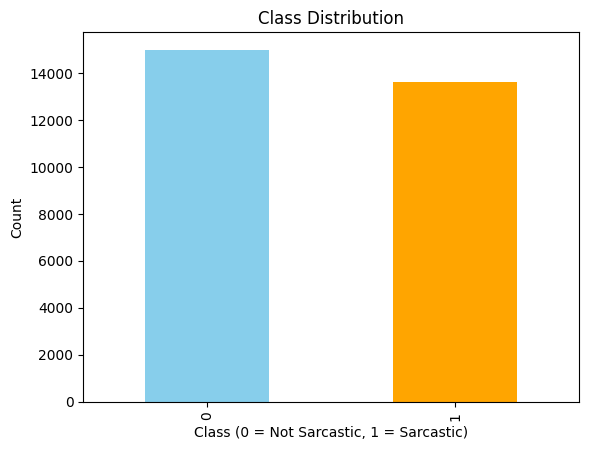

In [253]:
# Check the distribution of the target variable
import matplotlib.pyplot as plt

class_counts = data['is_sarcastic'].value_counts()
print("Class distribution:\n", class_counts)

# Plot the distribution
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class (0 = Not Sarcastic, 1 = Sarcastic)')
plt.ylabel('Count')
plt.show()


### Explore Random Headlines

In [254]:
# Display random samples of headlines
print("Random headlines:")
print(data['headline'].sample(10, random_state=17))


Random headlines:
15380            depressed monkey throwing shit at himself
13718    police headquarters completes new addition to ...
19008    man surprises girlfriend by drawing them in di...
20801    captain's hat really completes street lunatic'...
14061    nation tired of having to skim past headlines ...
9762         google launches 'the google' for older adults
13115    bathroom-disinfectant ad reinforces obsessive-...
16200    person cropped out of match.com picture clearl...
3088       senate's turn to act on patent reform this week
1917     physician shoots off a few adderall prescripti...
Name: headline, dtype: object


### Analyze Headline length

Headline length statistics:
count    28619.000000
mean        62.308571
std         20.726483
min          7.000000
25%         49.000000
50%         62.000000
75%         75.000000
max        926.000000
Name: headline_length, dtype: float64


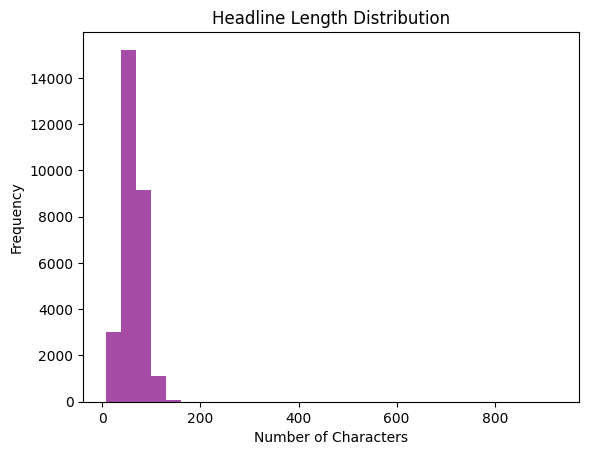

In [255]:
# Add a column for headline lengths
data['headline_length'] = data['headline'].apply(len)

# Display summary statistics for headline lengths
print("Headline length statistics:")
print(data['headline_length'].describe())

# Plot the distribution of headline lengths
plt.hist(data['headline_length'], bins=30, color='purple', alpha=0.7)
plt.title('Headline Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


### Sarcasm vs. Headline length

In [256]:
# Add a column for headline lengths
data['headline_length'] = data['headline'].apply(len)


Correlation matrix:
                 is_sarcastic  headline_length
is_sarcastic         1.000000         0.139099
headline_length      0.139099         1.000000


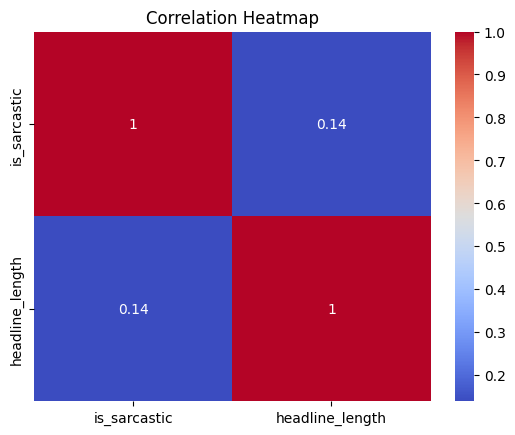

In [257]:
# Calculate correlation matrix
correlation = data[['is_sarcastic', 'headline_length']].corr()
print("Correlation matrix:")
print(correlation)


sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Headline length and sarcasm are minially positively correlated


### Common words in Sarcastic and Non-sarcastic

In [ ]:
# load the conllu dataset
with open("../Data/dataset.conllu") as f:
    data = conllu.parse(f.read())

stopwords = set(stopwords.words('english'))

In [ ]:
# function for finding the most common words of a label (class)
def common_words(label, n=20):
    words = [word['lemma'] for sentence in data for word in sentence if sentence.metadata['class'] == label]
    words = [word for word in words if re.match('\w', word) and word.lower() not in stopwords]
    return Counter(words).most_common()

print(common_words('0'))
print(common_words('1'))

[('trump', 1450), ('new', 686), ('say', 546), ('woman', 476), ('make', 460), ('donald', 458), ('get', 450), ('year', 381), ('man', 345), ('one', 272), ('day', 269), ('take', 260), ('way', 257), ('show', 255), ('good', 248), ('life', 247), ('people', 243), ('first', 242), ('world', 242), ('obama', 240), ('u.s', 235), ('want', 233), ('call', 231), ('thing', 230), ('need', 227), ('go', 220), ('time', 218), ('like', 217), ('gop', 215), ('watch', 212), ('black', 209), ('love', 208), ('clinton', 206), ('could', 205), ('5', 200), ('know', 199), ('house', 197), ('give', 196), ('white', 194), ('change', 194), ('state', 187), ('america', 186), ('star', 181), ('police', 178), ('look', 177), ('bill', 177), ('kid', 175), ('right', 174), ('president', 173), ('find', 173), ('hillary', 171), ('video', 170), ('help', 169), ('big', 167), ('back', 165), ('health', 165), ('old', 161), ('attack', 161), ('school', 160), ('win', 157), ('talk', 155), ('kill', 153), ('plan', 149), ('come', 148), ('may', 148), 

Important observations:
- Political figures are present in both classes with different frequencies, e.g. Trump has occured in non-sarcastic headlines four times that of sarcastics
- 'man' has occured in sarcastics four times more

These differences will probably make it harder to understand if our models are learning artifacts or not.

### Common names